#Assignment-3 Python Programming
## 3.1 Shivam's Data Science Experiment


Importing necessary libraries

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt


Set_random_seed: This function sets the random seed for both the Python random module and NumPy to ensure reproducibility.

In [ ]:
def set_random_seed(seed):
    random.seed(seed) #Set seed for Python's 'random' module
    np.random.seed(seed) #Set seed for NumPy's random number generator


Generate_datasets: This function generates a synthetic dataset with N data points where:

- X values are uniformly distributed in the range [xmin, xmax].
- Y values are computed using the formula: Y = A*f1(B*X)+C*f2(D*X)+E*f3(F*X)
- Returns: NumPy arrays of generated X and computed Y values.

In [ ]:
def generate_dataset(N, xmin, xmax):

    X = np.random.uniform(xmin, xmax, N) # Generate X values in [xmin, xmax]

    # Randomly generate the consts, we can define any range.
    A = random.uniform(0.5, 6)
    B = random.uniform(0.5, 3)
    C = random.uniform(0.5, 5)
    D = random.uniform(0.5, 6)
    E = random.uniform(0.5, 4)
    F = random.uniform(0.5, 7)

    # Define available functions in the form of dict.
    funcs = {'sin': math.sin, 'cos': math.cos, 'tan': math.tan,
        'cube': lambda x: x**3, 'square': lambda x: x**2,
        'log': lambda x: math.log(x) if x>0 else 0, #for log, the argument is positive.
    }

    # Randomly choose f1, f2, and f3.
    chosen_funcs = random.sample(list(funcs.keys()), 3)
    f1 = funcs[chosen_funcs[0]]
    f2 = funcs[chosen_funcs[1]]
    f3 = funcs[chosen_funcs[2]]

    # Print the values
    print(f"Random consts: A={A:.2f}, B={B:.2f}, C={C:.2f}, D={D:.2f}, E={E:.2f}, F={F:.2f}")
    print("Random funcs:", chosen_funcs[0], ",", chosen_funcs[1], ",", chosen_funcs[2])

    # Compute Y values by applying the function on each X.
    Y = []
    for x in X:
        try:
            yv = A*f1(B*x) + C*f2(D*x) + E*f3(F*x)
        except Exception as ex:
            yv = float('nan') # for errors like tan approaching infinity
        Y.append(yv)
    Y = np.array(Y)

    return X, Y


Plots a scatter plot of X vs Y.

In [ ]:
def plot_scatter(X, Y):
    plt.figure()
    plt.scatter(X, Y, c='red', label='Data points')
    plt.title('Scatter Plot of X vs Y')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.grid(True)
    plt.show()

Plots a histogram of X with the specified number of bins.

In [ ]:
def plot_histogram(X, bins=10):
    plt.figure()
    plt.hist(X, bins=bins, color='yellow', edgecolor='black')
    plt.title('Histogram of X')
    plt.xlabel('X values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Plots a box plot of Y to identify potential outliers.

In [ ]:
def plot_box(Y):
    plt.figure()
    plt.boxplot(Y, vert=True, patch_artist=True)
    plt.title('Box Plot of Y')
    plt.ylabel('Y values')
    plt.grid(True)
    plt.show()

Plots a line graph of sorted X values against the corresponding Y values. Sorting X helps in visualizing underlying trends.

In [ ]:
def plot_line(X, Y):
    si = np.argsort(X)
    X_s = X[si] # sorted indexes
    Y_s = Y[si]

    plt.figure()
    plt.plot(X_s, Y_s, marker='o', linestyle='-', color='red')
    plt.title('Line Plot of Sorted X vs Y')
    plt.xlabel('Sorted X values')
    plt.ylabel('Y values')
    plt.grid(True)
    plt.show()

Main Function:

Enter the number of data points: 5
Enter the min value for X: 1
Enter the maxi value for X: 10
Random consts: A=2.31, B=2.96, C=4.82, D=5.55, E=3.26, F=6.19
Random funcs chosen: sin , square , cos


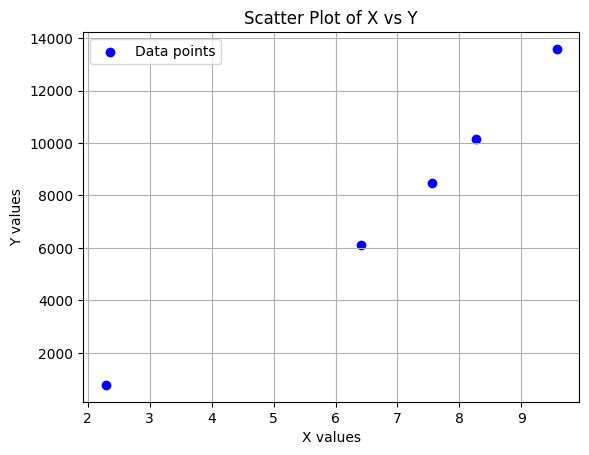

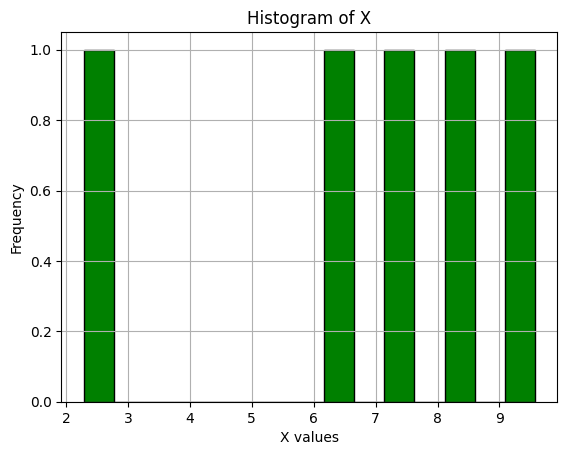

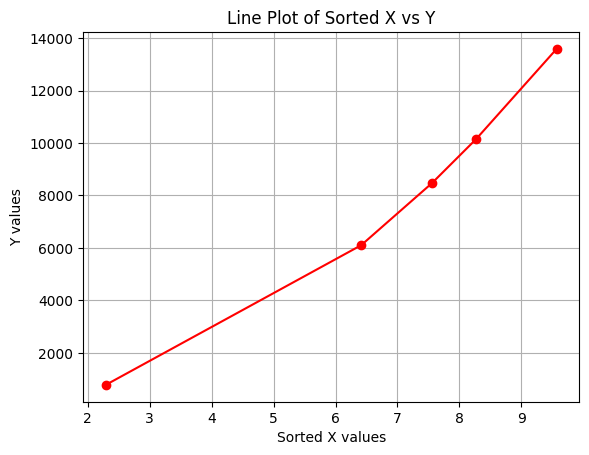

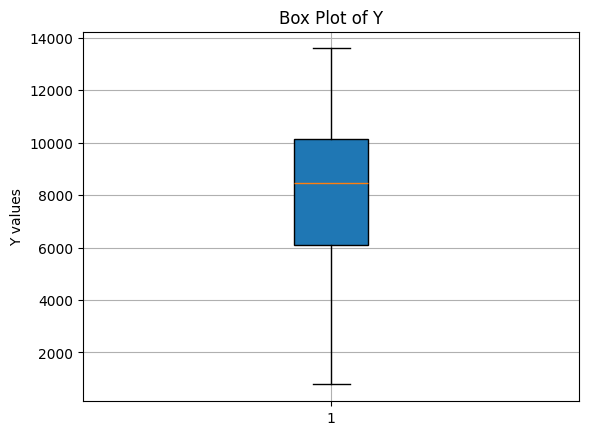

In [ ]:
if __name__ == "__main__":
    # User to customize the number of data points and range for X.
    try:
        N = int(input("Enter the number of data points: "))
        xmin = float(input("Enter the min value for X: "))
        xmax = float(input("Enter the maxi value for X: "))
    except ValueError:
        print("Invalid input! Pls enter num values.")
        exit(1)

    # Set a random seed for reproducibility.
    seed_value = 36
    set_random_seed(seed_value)

    # Generate the synthetic dataset.
    X, Y = generate_dataset(N, xmin, xmax)

    # Display the various plots.
    plot_scatter(X, Y)
    plot_histogram(X, bins=15)
    plot_line(X, Y)
    plot_box(Y)